<a href="https://colab.research.google.com/github/Satwikram/Advanced-CNN-Architecture-Implementations/blob/master/Fruits_Recognition_using_Lenet_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

{}

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge             COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-03 00:51:53          71785  
roche-data-science-coalition/uncover                          UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          10483  
stefanlarson/outofscope-intent-classification-dataset         Out-of-Scope Intent Classification Dataset          285KB  2020-05-15 03:04:34              1  
devinaconley/covid19-mobility-data                            COVID-19 Google mobility data                         4MB  2020-05-30 15:21:00              2  
gomes555/road-transport-brazil                      

In [7]:
!kaggle datasets download -d chrisfilo/fruit-recognition

fruit-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip /content/fruit-recognition.zip

Archive:  /content/fruit-recognition.zip
replace Apple/Apple A/Apple 1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Solving fruit classification problem using Lenet Architecture

In [0]:
#Importing Librarries
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import cv2
%matplotlib inline

In [0]:
img_size =  (150, 150)
dataset = []

In [0]:
#Defining the function to get the data
def get_data(dest, source, label):

  count = 0

  for img in os.listdir(source):

    if count >= 500:
      print("Collected",count,"images")
      print("Stoped collecting")
      break

    else:
      try:
        count = count + 1
        img_array = cv2.imread(os.path.join(source, img), cv2.IMREAD_COLOR)
        resized_array = cv2.resize(img_array, img_size)

        dest.append([resized_array, label])

      except:
        pass



In [4]:
get_data(dataset, '/content/Apple/Total Number of Apples', 0)

Collected 500 images
Stoped collecting


In [5]:
get_data(dataset, '/content/Banana', 1)

Collected 500 images
Stoped collecting


In [6]:
get_data(dataset, '/content/Carambola', 2)

Collected 500 images
Stoped collecting


In [7]:
get_data(dataset, '/content/Guava/guava total final', 3)

Collected 500 images
Stoped collecting


In [8]:
get_data(dataset, '/content/Kiwi/Total Number of Kiwi fruit', 4)

Collected 500 images
Stoped collecting


In [9]:
get_data(dataset, '/content/Mango', 5)

Collected 500 images
Stoped collecting


In [10]:
get_data(dataset, '/content/Orange', 6)

Collected 500 images
Stoped collecting


In [11]:
get_data(dataset, '/content/Peach', 7)

Collected 500 images
Stoped collecting


In [12]:
get_data(dataset, '/content/Pear', 8)

Collected 500 images
Stoped collecting


In [13]:
get_data(dataset, '/content/Persimmon', 9)

Collected 500 images
Stoped collecting


In [14]:
get_data(dataset, '/content/Pitaya', 10)

Collected 500 images
Stoped collecting


In [15]:
get_data(dataset, '/content/Plum', 11)

Collected 500 images
Stoped collecting


In [16]:
get_data(dataset, '/content/Pomegranate', 12)

Collected 500 images
Stoped collecting


In [17]:
get_data(dataset, '/content/Tomatoes', 13)

Collected 500 images
Stoped collecting


In [18]:
get_data(dataset, '/content/muskmelon', 14)

Collected 500 images
Stoped collecting


In [19]:
len(dataset)


7500

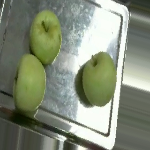

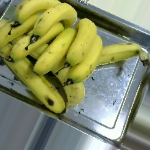

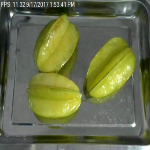

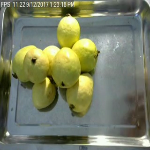

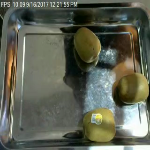

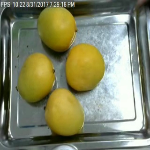

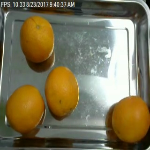

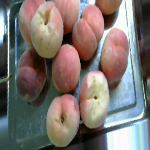

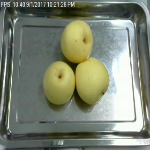

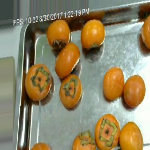

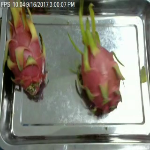

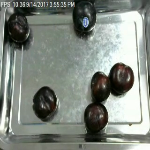

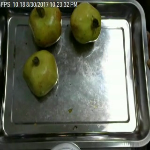

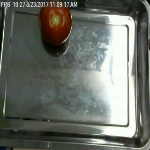

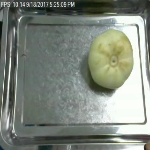

In [20]:
from google.colab.patches import cv2_imshow
for i in range(0, len(dataset), 500):
  cv2_imshow(dataset[i][0])


In [0]:
dataset = np.array(dataset)


In [22]:
len(dataset)

7500

In [23]:
dataset[0][0]

array([[[58, 65, 61],
        [44, 55, 51],
        [49, 57, 54],
        ...,
        [35, 48, 40],
        [34, 47, 39],
        [34, 47, 39]],

       [[58, 64, 61],
        [42, 54, 49],
        [58, 66, 63],
        ...,
        [37, 49, 41],
        [37, 49, 41],
        [35, 48, 40]],

       [[56, 62, 58],
        [42, 54, 49],
        [64, 75, 70],
        ...,
        [42, 52, 45],
        [41, 51, 44],
        [40, 51, 43]],

       ...,

       [[59, 67, 64],
        [60, 68, 65],
        [58, 66, 62],
        ...,
        [88, 96, 92],
        [88, 96, 92],
        [89, 96, 94]],

       [[59, 67, 64],
        [59, 67, 64],
        [56, 64, 60],
        ...,
        [87, 95, 91],
        [87, 95, 91],
        [87, 95, 91]],

       [[59, 67, 64],
        [59, 67, 63],
        [55, 63, 60],
        ...,
        [87, 95, 91],
        [87, 95, 91],
        [87, 95, 91]]], dtype=uint8)

In [0]:
X = []
y =  []

In [0]:
for i in range(0, len(dataset)):
  X.append(dataset[i][0])
  y.append(dataset[i][1])

Splitting the dataset

In [26]:
len(X)


7500

In [27]:
len(y)

7500

In [28]:
for i in range(0,len(y), 500):
  print(y[i])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1 ,random_state = 42)


In [30]:
len(X_train)

6750

In [31]:
len(X_test)

750

In [32]:
0.1*len(X_train)

675.0

In [0]:
X_valid, y_valid, X_train, y_train = X_train[:675], y_train[:675], X_train[675:], y_train[675:]

In [34]:
len(X_valid)

675

In [35]:
len(y_valid)

675

In [36]:
print(len(X_test))
print(len(y_test))

750
750


In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)


In [38]:
print(X_train.shape)
X_train[0].shape

(6075, 150, 150, 3)


(150, 150, 3)

In [0]:
X_train = X_train / 255
X_test = X_test / 255
X_valid = X_valid / 255


In [0]:
y_train = tf.keras.utils.to_categorical(y_train, 15)
y_test = tf.keras.utils.to_categorical(y_test, 15)
y_valid = tf.keras.utils.to_categorical(y_valid, 15)

Designing Lenet Architecture

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [42]:
tf.__version__

'2.2.0'

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(6, kernel_size= (5,5), input_shape = X_train[0].shape, activation = 'relu'))

In [0]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
model.add(Conv2D(16,  kernel_size= (5,5), activation = 'relu'))

In [0]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(units = 120, activation = 'relu'))

In [0]:
model.add(Dense(units = 84, activation = 'relu'))

In [0]:
model.add(Dense(15, activation='softmax'))


In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])


In [53]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10,verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
190/190 [==============================] - 131s 690ms/step - loss: 1.7970 - accuracy: 0.4300 - val_loss: 0.8338 - val_accuracy: 0.7437
Epoch 2/10
190/190 [==============================] - 133s 701ms/step - loss: 0.5613 - accuracy: 0.8212 - val_loss: 0.5164 - val_accuracy: 0.8385
Epoch 3/10
190/190 [==============================] - 132s 697ms/step - loss: 0.2836 - accuracy: 0.9052 - val_loss: 0.3928 - val_accuracy: 0.8726
Epoch 4/10
190/190 [==============================] - 135s 713ms/step - loss: 0.1599 - accuracy: 0.9473 - val_loss: 0.4587 - val_accuracy: 0.8696
Epoch 5/10
190/190 [==============================] - 134s 703ms/step - loss: 0.0816 - accuracy: 0.9779 - val_loss: 0.6458 - val_accuracy: 0.8400
Epoch 6/10
190/190 [==============================] - 134s 705ms/step - loss: 0.0622 - accuracy: 0.9826 - val_loss: 0.4816 - val_accuracy: 0.8667
Epoch 7/10
190/190 [==============================] - 133s 700ms/step - loss: 0.0475 - accuracy: 0.9868 - val_loss: 0.5131 -

WOW thats great, reached almost 100% accuracy in just 10 epochs

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 6)       456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               2219640   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
model.save('my_model.h5')

In [0]:
from tensorflow.keras.models import load_model

In [0]:
my_model = load_model('/content/my_model.h5')

In [60]:
score = my_model.evaluate(X_test, y_test)

24/24 [==============================] - 6s 254ms/step - loss: 0.6223 - accuracy: 0.8720


In [61]:
score

[0.6223376989364624, 0.871999979019165]

Great!, Model did well for 10 epochs.
Model can be improved with other advacnced Architectures

In [0]:
img = cv2.imread('/content/Mango/Mango001210.png', cv2.IMREAD_COLOR)

In [0]:
img = cv2.resize(img, (150, 150))

In [64]:
img.shape

(150, 150, 3)

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

In [0]:
result = my_model.predict(img)

In [69]:
result

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

Lenet Did Well, Hehe